In [1]:
from statistics import *

In [2]:
Fiducial = Universe()

In [3]:
Fiducial.runCAMB()

In [4]:
path = '/data/gnedin/REI/D/Cai.B80.N512L2.sf=1_uv=0.15_bw=10_res=100.WC1/A/IFRIT/'
A = Map(Fiducial, path=path, z_max=50)

In [5]:
tau, dtau, dtau_patchy, dtau_fluc = A.tauSlices()

0.02 49.0
0.0224 43.642857142857146
0.0253 38.52569169960474
0.0274 35.496350364963504
0.0297 32.67003367003367
0.0323 29.959752321981423
0.0351 27.49002849002849
0.0378 25.455026455026456
0.0397 24.188916876574307
0.0422 22.696682464454977
0.045 21.22222222222222
0.0477 19.964360587002098
0.0503 18.880715705765407
0.0522 18.157088122605362
0.0549 17.214936247723134
0.0575 16.391304347826086
0.0603 15.58374792703151
0.0622 15.077170418006432
0.0647 14.45595054095827
0.0674 13.836795252225519
0.0702 13.245014245014245
0.0722 12.850415512465373
0.0747 12.386880856760374
0.0773 11.9366106080207
0.08 11.5
0.0829 11.062726176115802
0.0847 10.80637544273908
0.0873 10.45475372279496
0.0899 10.123470522803116
0.0926 9.799136069114471
0.0955 9.471204188481675
0.0975 9.256410256410255
0.1 9.0
0.1052 8.505703422053232
0.1099 8.099181073703367
0.1154 7.665511265164644
0.1199 7.340283569641368
0.1247 7.019246190858059
0.1297 6.710100231303007
0.1351 6.401924500370097
0.1399 6.147962830593281
0.1447

In [6]:
tau_map, dtau_map, dtau_patchy_map, dtau_fluc_map = A.genTauMap()

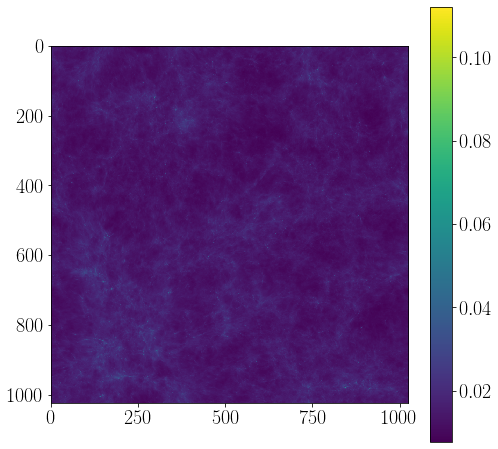

In [7]:
plt.figure(figsize=(8,8))
plt.imshow(tau_map)
plt.colorbar()
plt.show()

Note: redshifts have been re-sorted (earliest first)
(217,)
(150,)
(150, 217)
(229,)
(229,)


/home/nmishra/OpticalDepthProject/statistics.py:73: RuntimeWarning: divide by zero encountered in true_divide
  k_temp = (ells + 1/2)/chi_val
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


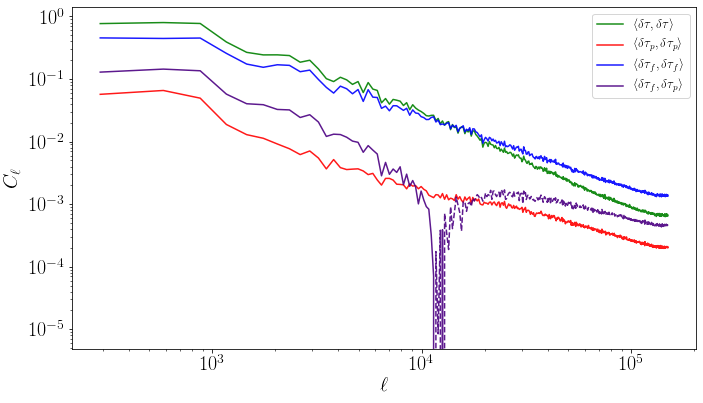

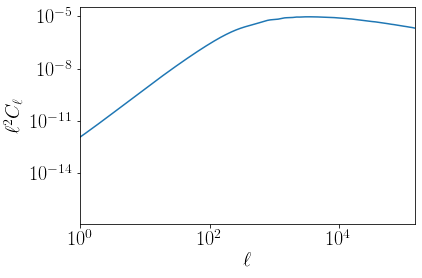

In [8]:
A_Stats = Statistics(A)

z_range = np.linspace(0,40,150)
ells, C_ell = A_Stats.theorySpectrum(z_range=z_range)

ell_vals, Abins_dtaup_dtauf = A_Stats.crossPowerSpectrum(dtau_patchy_map, dtau_fluc_map)
ell_vals, Abins_dtau = A_Stats.autoPowerSpectrum(dtau_map)
ell_vals, Abins_dtaup = A_Stats.autoPowerSpectrum(dtau_patchy_map)
ell_vals, Abins_dtauf = A_Stats.autoPowerSpectrum(dtau_fluc_map)

plt.figure(figsize=(10,6))

plt.errorbar(ell_vals, Abins_dtau, label=r'$\langle \delta \tau,\delta \tau \rangle$',alpha=0.9, color='g', fmt='-')
plt.errorbar(ell_vals, Abins_dtaup, label=r'$\langle \delta \tau_p,\delta \tau_p \rangle$',alpha=0.9, color='r', fmt='-')
plt.errorbar(ell_vals, Abins_dtauf, label=r'$\langle \delta \tau_f,\delta \tau_f \rangle$',alpha=0.9, color='b', fmt='-')

plt.errorbar(ell_vals, Abins_dtaup_dtauf, label=r'$\langle \delta \tau_f,\delta \tau_p \rangle$',alpha=0.9, color='indigo', fmt='-')
plt.errorbar(ell_vals, -Abins_dtaup_dtauf, alpha=0.9, color='indigo', fmt='--')

#plt.errorbar(ell_vals, Abins_dtaup + Abins_dtauf + Abins_dtaup_dtauf, label='test',alpha=0.9, color='black', fmt='-')

plt.xlabel(r"$\ell$")
plt.ylabel("$C_\ell$")
plt.tight_layout()
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.savefig('./figs/ps_test.pdf')
plt.show()

plt.loglog(ells, C_ell * ells**2 / 2 / np.pi)
plt.xlim(1, max(ells))
plt.xlabel(r"$\ell$")
plt.ylabel("$\ell^2 C_\ell$")
#plt.loglog(ell_vals, Abins_dtau)
plt.show()

$\tau = c \sigma_T \int (x_e n_b ) dx$


$\delta\tau = c \sigma_T \int (x_e n_b - \bar{x}_e\bar{n}_b) dx$


$x_e n_b - \bar{x}_e\bar{n}_b = (x_e - \bar{x}_e) n_b + \bar{x}_e (n_b - \bar{n}_b)$